# Clean trans results

This notebook filters the trans results by retaining variants with MAF > 0.05 and p < 1×10⁻⁵, and removes trans loci that are explained solely by AD loci but whose signals originate from block boundaries. The filtering criterion is defined as having signals in a neighboring block located within 100 kb of the boundary.

The filtered trans results are stored at: s3://statfungen/ftp_fgc_xqtl/analysis_result/trans/FunGen_xQTL.trans.exported.toploci.bed.gz.

## Check Boundry

In [1]:
library(tidyverse)
library(data.table)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
trans <- fread('~/Work/trans/TensorQTL_post/FunGen_xQTL.trans.nofiltered.exported.toploci.bed.gz')

In [3]:
trans %>% head

#chr,start,end,a1,a2,variant_ID,MAF,betahat,sebetahat,z,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,PIP,conditional_effect,resource
<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,896978,896979,T,C,chr1:896979:C:T,0.02463768,0.6624651,0.1094392,6.053272,chr1_16103_2888443,Knight_eQTL_ENSG00000168496,2,2,2,0.38040437,0.5381642,Knight_eQTL
1,898882,898883,T,C,chr1:898883:C:T,0.01906158,0.7379140,0.1179395,6.256717,chr1_16103_2888443,Knight_eQTL_ENSG00000168496,2,2,2,0.23974357,0.5723862,Knight_eQTL
1,903284,903285,C,T,chr1:903285:T:C,0.02052786,0.6586505,0.1138062,5.787474,chr1_16103_2888443,Knight_eQTL_ENSG00000168496,2,2,0,0.04172245,0.5084460,Knight_eQTL
1,903351,903352,A,G,chr1:903352:G:A,0.02052786,0.6586505,0.1138062,5.787474,chr1_16103_2888443,Knight_eQTL_ENSG00000168496,2,0,0,0.04172245,0.5084460,Knight_eQTL
1,903509,903510,G,A,chr1:903510:A:G,0.02052786,0.6586505,0.1138062,5.787474,chr1_16103_2888443,Knight_eQTL_ENSG00000168496,2,0,0,0.04172245,0.5084460,Knight_eQTL
1,903535,903536,T,A,chr1:903536:A:T,0.02052786,0.6586505,0.1138062,5.787474,chr1_16103_2888443,Knight_eQTL_ENSG00000168496,2,0,0,0.04172245,0.5084460,Knight_eQTL


In [4]:
trans_only_gwas_cs_sum_raw <- readRDS('trans_only.loci.info.rds')
trans_only_gwas_cs_sum <- trans_only_gwas_cs_sum_raw %>% 
  separate_rows(events, sep = ",") %>% 
    mutate(resource = str_remove(events, '_ENSG.+|_gp_.+'), 
          gene = str_extract(events, 'ENSG.+'))

In [24]:
trans_only_gwas_cs_sum_raw %>% pull(region) %>% unique 

[1] "chr11_119829118_122612025" "chr15_47690138_49901356"  
 [3] "chr15_49901356_51733753"   "chr16_78676505_80260790"  
 [5] "chr16_88382277_90220225"   "chr1_158933969_162352348" 
 [7] "chr20_40697409_42726168"   "chr2_125689597_127728648" 
 [9] "chr2_158720603_160577800"  "chr3_154360351_156292136" 
[11] "chr5_139769624_142619401"  "chr5_149895776_152257891" 
[13] "chr8_26225312_27515963"

In [5]:
nrow(trans_only_gwas_cs_sum)

[1] 21

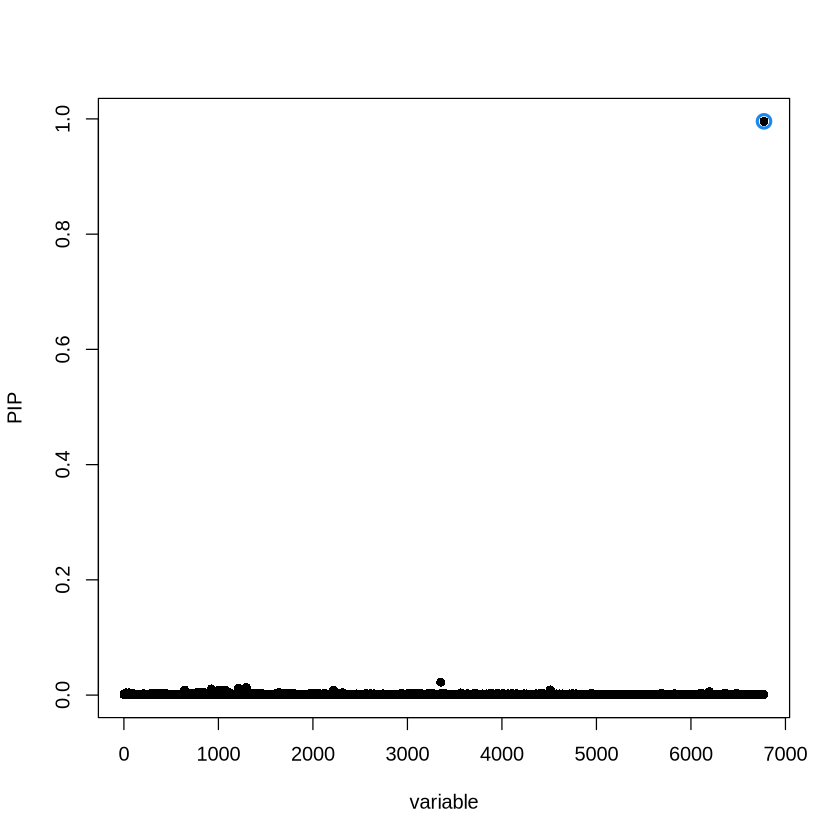

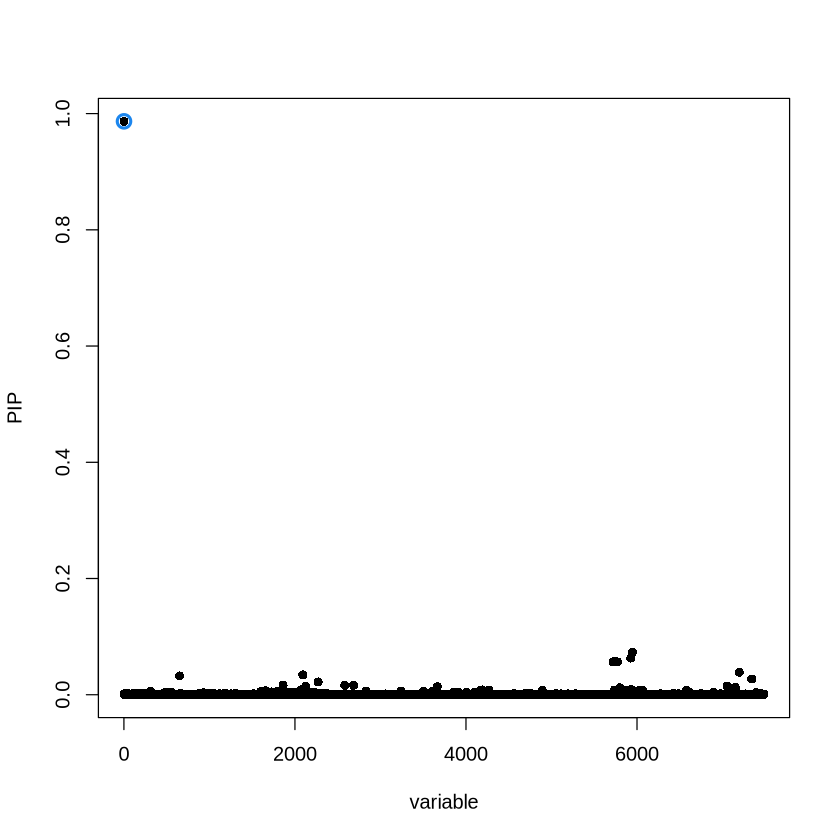

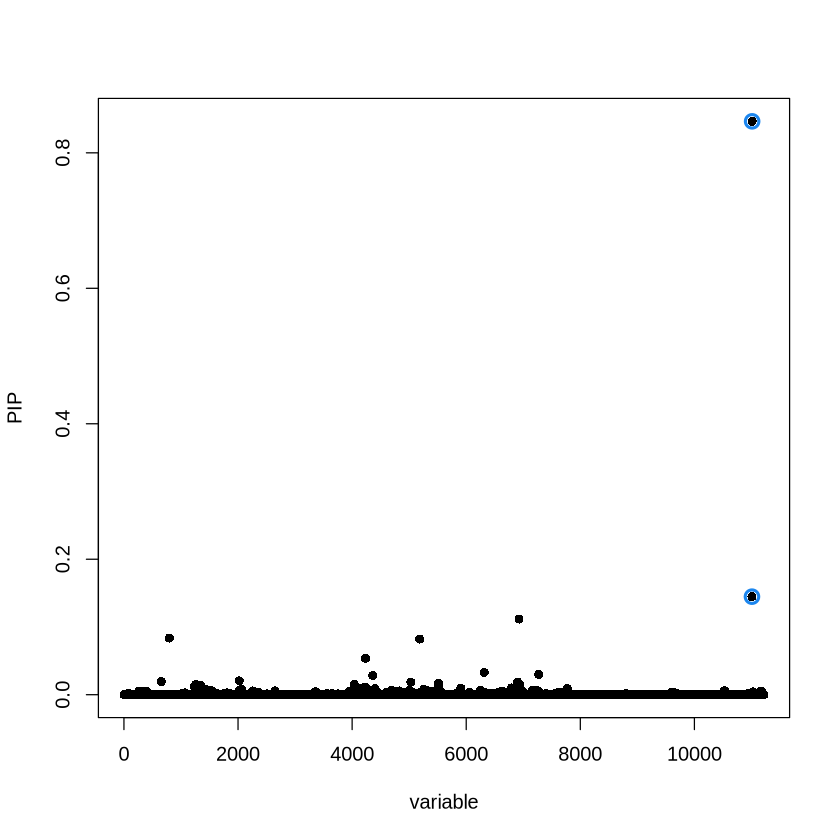

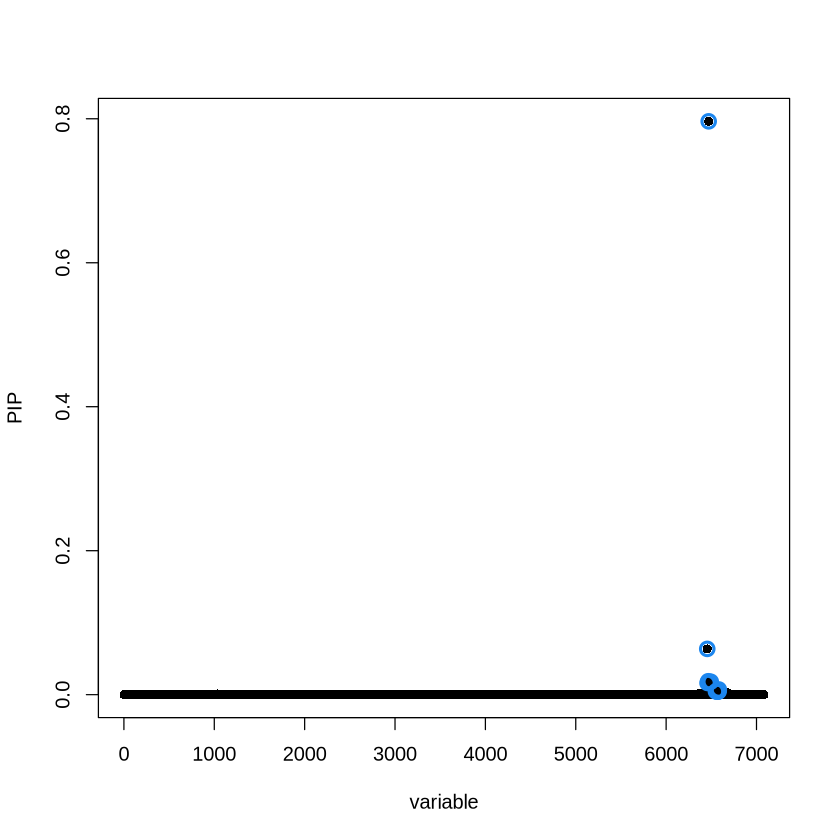

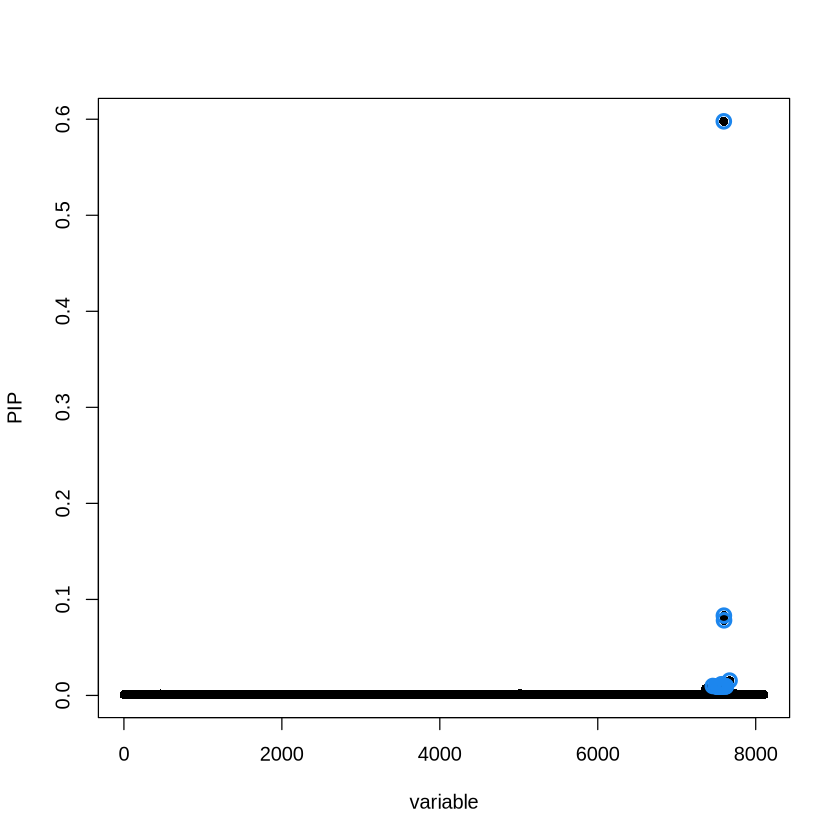

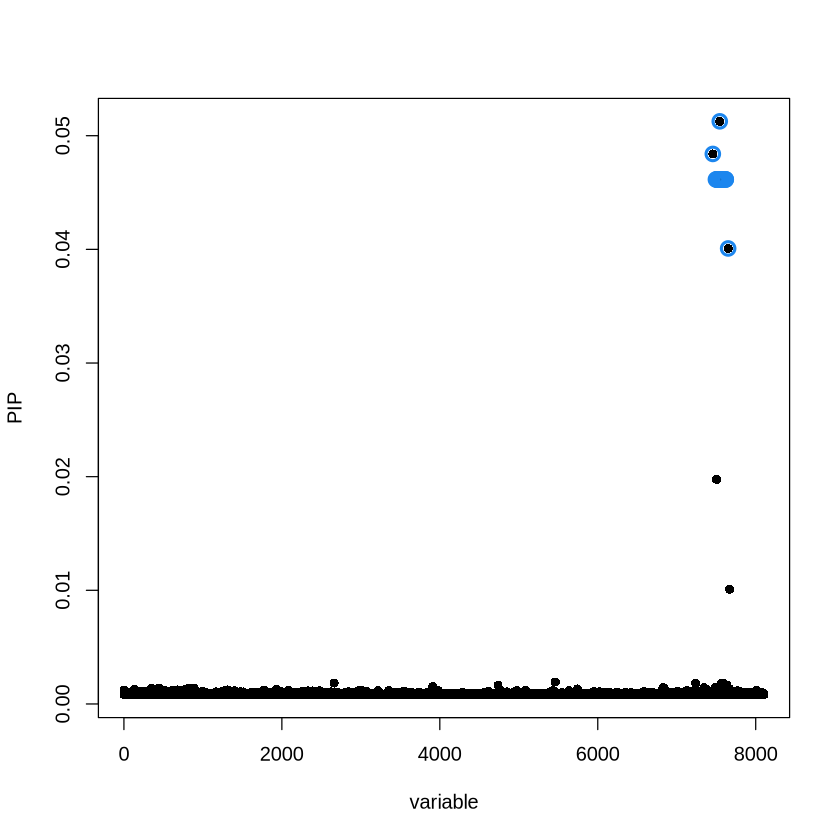

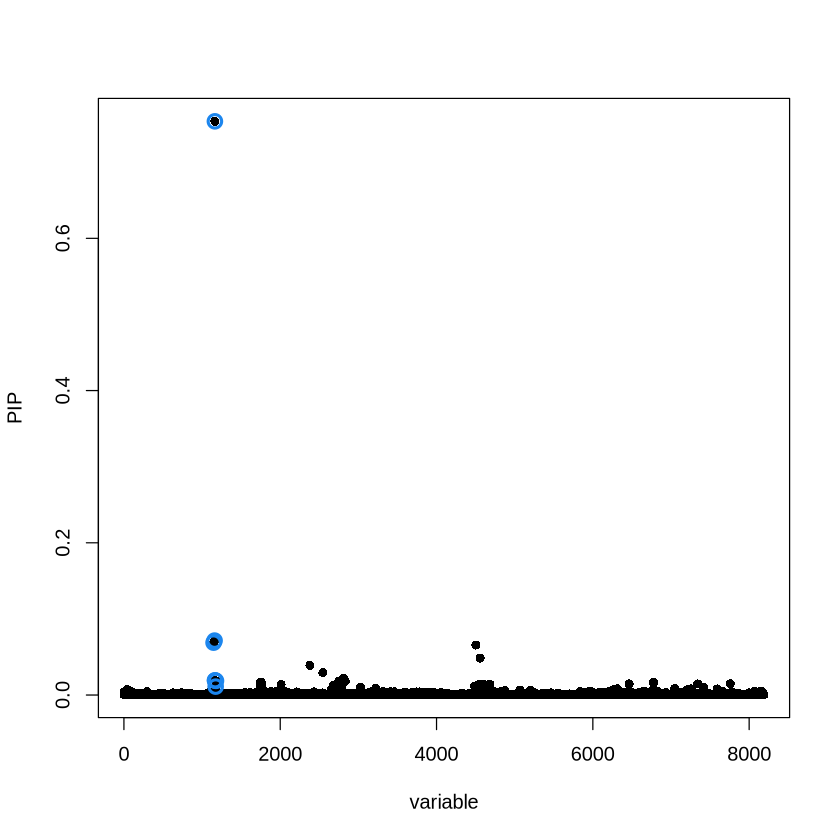

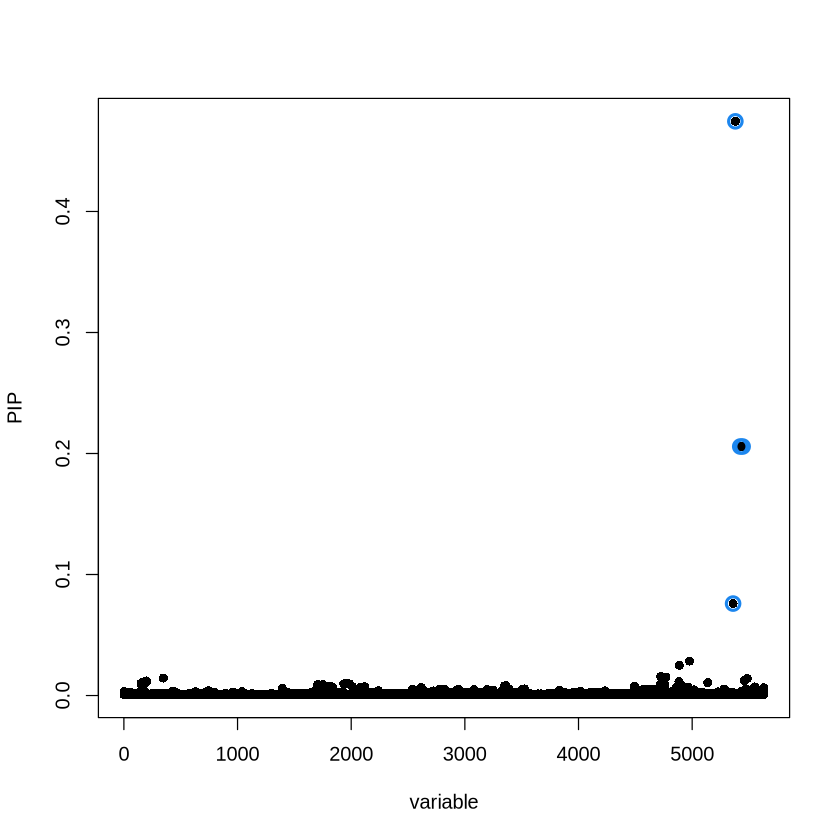

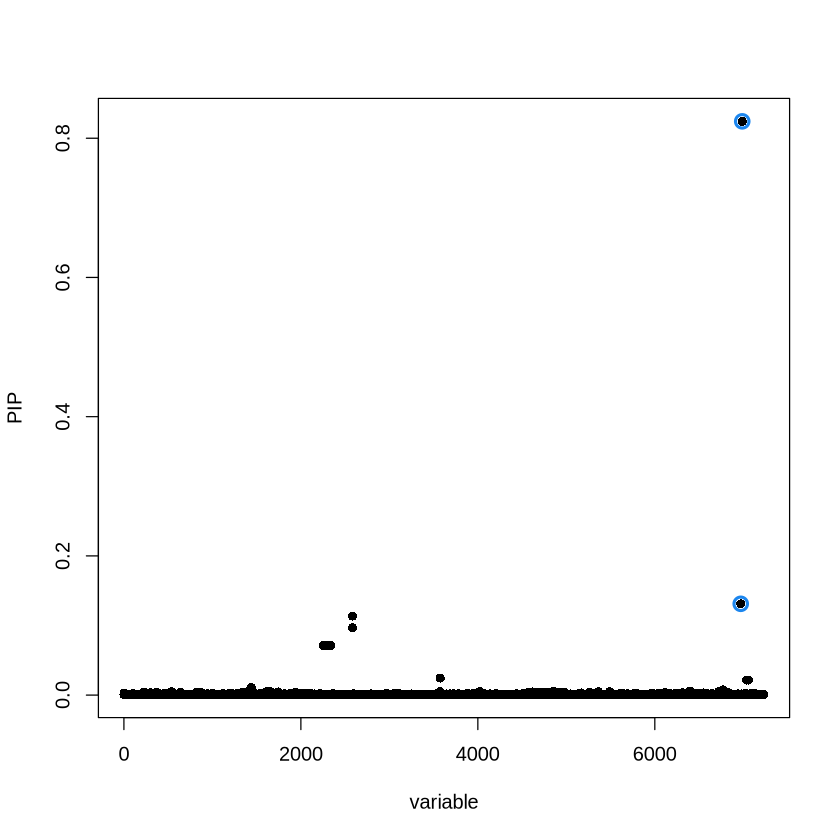

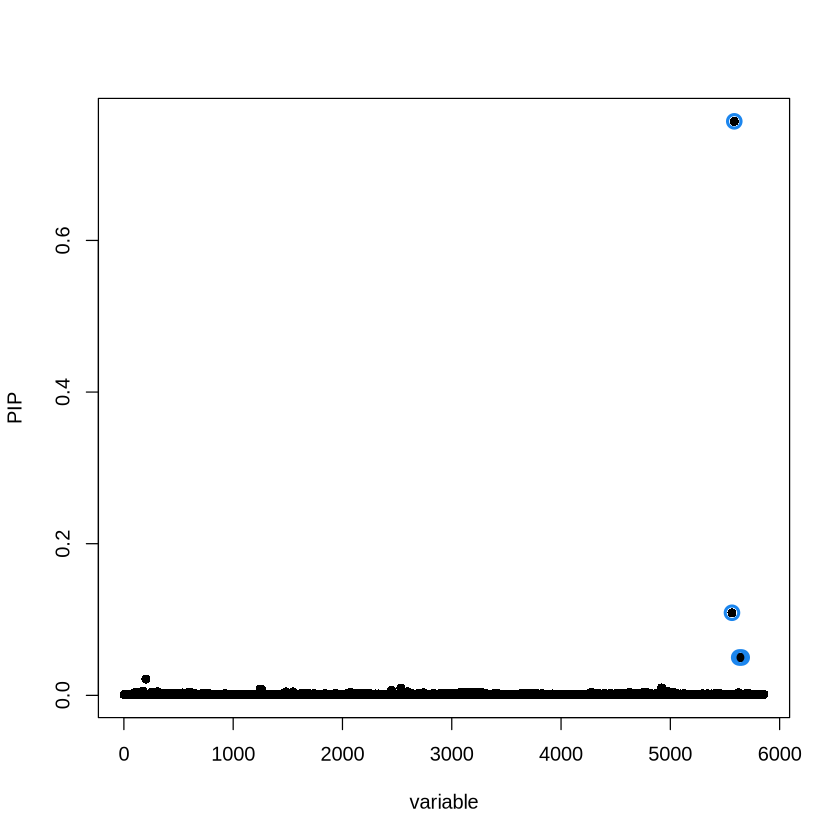

In [6]:
# i=7
library(susieR)
trans_path <- '/home/fengr1/Work/trans/TensorQTL_post/'
boundry_indexs <- c(2, 3, 6, 10, 11, 12, 16, 19, 20, 21)
for(i in boundry_indexs){
    sob_files <- list.files(paste0(trans_path, trans_only_gwas_cs_sum$resource[i], '/fine_mapping'), '.univariate_bvsr.rds', full.names = T)

    sob_file <- sob_files %>% .[str_detect(sob_files, trans_only_gwas_cs_sum$region[i])]

    sob <- readRDS(sob_file)
    susie_plot(sob[[1]][[trans_only_gwas_cs_sum$events[i]]][['susie_result_trimmed']],"PIP")

}


In [25]:
trans_only_gwas_cs_sum[boundry_indexs, ] %>% pull(region) %>% unique 

[1] "chr15_47690138_49901356"  "chr15_49901356_51733753" 
[3] "chr16_88382277_90220225"  "chr2_158720603_160577800"
[5] "chr5_139769624_142619401" "chr8_26225312_27515963"

In [7]:
trans_only_gwas_cs_sum_boundry <- trans_only_gwas_cs_sum[boundry_indexs,]

In [8]:
trans_only_gwas_cs_sum_boundry

region,n_event,events,studies,resource,gene
<chr>,<int>,<chr>,<chr>,<chr>,<chr>
chr15_47690138_49901356,1,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000087263
chr15_49901356_51733753,1,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000087263
chr16_88382277_90220225,1,ROSMAP_gpQTL_gp_2508,AD_Bellenguez_2022,ROSMAP_gpQTL,NA
chr2_158720603_160577800,3,MSBB_eQTL_BM10_ENSG00000213579,AD_Bellenguez_2022,MSBB_eQTL_BM10,ENSG00000213579
chr2_158720603_160577800,3,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000179611,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000179611
chr2_158720603_160577800,3,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000105220
chr5_139769624_142619401,1,MSBB_eQTL_BM10_ENSG00000136840,AD_Kunkle_Stage1_2019,MSBB_eQTL_BM10,ENSG00000136840
chr8_26225312_27515963,3,MSBB_eQTL_BM36_ENSG00000140987,AD_Wightman_Full_2021,MSBB_eQTL_BM36,ENSG00000140987
chr8_26225312_27515963,3,ROSMAP_gpQTL_gp_7827,AD_Wightman_Full_2021,ROSMAP_gpQTL,NA


In [9]:
# assumes: trans_only_gwas_cs_sum_boundry, trans, safe_min(), dplyr, stringr are available

# helper: safe minimum (Inf if empty or all NA)
safe_min <- function(x) {
  if (length(x) == 0 || all(is.na(x))) return(Inf)
  suppressWarnings(min(x, na.rm = TRUE))
}

for (i in seq_len(nrow(trans_only_gwas_cs_sum_boundry))) {
  # parse target block info
  target_blocks       <- trans_only_gwas_cs_sum_boundry$region[i]
  target_blocks_chr   <- str_split(target_blocks, "_", simplify = TRUE)[, 1]
  target_blocks_start <- str_split(target_blocks, "_", simplify = TRUE)[, 2] %>% as.numeric()
  target_blocks_end   <- str_split(target_blocks, "_", simplify = TRUE)[, 3] %>% as.numeric()

  # find neighbor blocks that share a boundary with target (but exclude the target itself)
  trans_neighbors <- trans %>%
    filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>%
    mutate(
      block_chr   = str_split(gene_ID, "_", simplify = TRUE)[, 1],
      block_start = str_split(gene_ID, "_", simplify = TRUE)[, 2] %>% as.numeric(),
      block_end   = str_split(gene_ID, "_", simplify = TRUE)[, 3] %>% as.numeric()
    ) %>%
    filter(
      block_chr == target_blocks_chr &
        (
          block_start == target_blocks_start |
            block_end == target_blocks_start |
            block_start == target_blocks_end |
            block_end == target_blocks_end
        )
    ) %>%
    filter(!(block_chr == target_blocks_chr &
               block_start == target_blocks_start &
               block_end == target_blocks_end)) %>%
    # compute distance from variant end to neighbor block boundaries
    mutate(
      end_num = suppressWarnings(as.numeric(end)),
      dis = pmin(
        abs(end_num - block_start),
        abs(end_num - block_end),
        na.rm = TRUE
      )
    )

  if (nrow(trans_neighbors) > 0) {
    cat(trans_only_gwas_cs_sum_boundry$events[i], "have neighbor block in exported results")

    # decision based on closest signal to boundary (100 kb threshold)
    min_dis <- safe_min(trans_neighbors$dis)

    if (min_dis < 1e6) {
      trans_only_gwas_cs_sum_boundry$filter_decision[i] <- TRUE
      cat(" and closest signal to boundary is at:", min_dis, "\n")
    } else {
      trans_only_gwas_cs_sum_boundry$filter_decision[i] <- FALSE
      if (is.infinite(min_dis)) {
        cat(" no neighbor signals found; DO NOT have signal in 100k of boundary\n")
      } else {
        cat(" but DO NOT have signal in 100k of boundary (closest:", min_dis, ")\n")
      }
    }
  } else {
    # no neighbor blocks matched; mark as not filtered
    trans_only_gwas_cs_sum_boundry$filter_decision[i] <- FALSE
    cat(trans_only_gwas_cs_sum_boundry$events[i], "no neighbor block in exported results\n")
  }
}

ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263 have neighbor block in exported results

Warning message:
“Unknown or uninitialised column: `filter_decision`.”


 and closest signal to boundary is at: 0 
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263 have neighbor block in exported results and closest signal to boundary is at: 0 
ROSMAP_gpQTL_gp_2508 no neighbor block in exported results
MSBB_eQTL_BM10_ENSG00000213579 no neighbor block in exported results
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000179611 no neighbor block in exported results
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220 no neighbor block in exported results
MSBB_eQTL_BM10_ENSG00000136840 no neighbor block in exported results
MSBB_eQTL_BM36_ENSG00000140987 no neighbor block in exported results
ROSMAP_gpQTL_gp_7827 no neighbor block in exported results
MSBB_eQTL_BM22_ENSG00000137270 no neighbor block in exported results


In [ ]:
for (i in seq_len(nrow(trans_only_gwas_cs_sum_boundry))) {
    target_blocks <- trans_only_gwas_cs_sum_boundry$region[i]
    message("target block: ",  target_blocks, ' in ', trans_only_gwas_cs_sum_boundry$events[i])
    target_blocks_chr   <- str_split(target_blocks, "_", simplify = TRUE)[, 1]
    cat("block on same chromosome are ", trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% pull(gene_ID ) %>% unique  %>% .[str_detect(., target_blocks_chr)], '\n' )
}

target block: chr15_47690138_49901356 in ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263



block on same chromosome are  chr15_47690138_49901356 chr15_49901356_51733753 


target block: chr15_49901356_51733753 in ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263



block on same chromosome are  chr15_47690138_49901356 chr15_49901356_51733753 


target block: chr16_88382277_90220225 in ROSMAP_gpQTL_gp_2508



block on same chromosome are  chr16_88382277_90220225 


target block: chr2_158720603_160577800 in MSBB_eQTL_BM10_ENSG00000213579



block on same chromosome are  chr2_158720603_160577800 


target block: chr2_158720603_160577800 in ROSMAP_DeJager_eQTL_Monocyte_ENSG00000179611



block on same chromosome are  chr2_158720603_160577800 


target block: chr2_158720603_160577800 in ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220



block on same chromosome are  chr2_158720603_160577800 chr2_176462474_179338809 


target block: chr5_139769624_142619401 in MSBB_eQTL_BM10_ENSG00000136840



block on same chromosome are  chr5_139769624_142619401 


target block: chr8_26225312_27515963 in MSBB_eQTL_BM36_ENSG00000140987



block on same chromosome are  chr8_26225312_27515963 


target block: chr8_26225312_27515963 in ROSMAP_gpQTL_gp_7827



block on same chromosome are  chr8_26225312_27515963 


target block: chr8_26225312_27515963 in MSBB_eQTL_BM22_ENSG00000137270



block on same chromosome are  chr8_26225312_27515963 


In [27]:
i=1
trans_only_gwas_cs_sum_boundry$region[i]
trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% arrange(`#chr`) %>% select(event_ID, gene_ID) %>% distinct

[1] "chr15_47690138_49901356"

event_ID,gene_ID
<chr>,<chr>
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr1_29689521_31147701
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr1_170228106_172965199
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr3_10633421_12819971
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr6_166767544_167981705
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr7_71528863_73724576
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr8_3113856_3646595
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr8_136512469_140094718
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr15_47690138_49901356
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr15_49901356_51733753


In [28]:
i=2
trans_only_gwas_cs_sum_boundry$region[i]
trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% arrange(`#chr`) %>% select(event_ID, gene_ID) %>% distinct

[1] "chr15_49901356_51733753"

event_ID,gene_ID
<chr>,<chr>
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr1_29689521_31147701
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr1_170228106_172965199
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr3_10633421_12819971
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr6_166767544_167981705
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr7_71528863_73724576
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr8_3113856_3646595
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr8_136512469_140094718
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr15_47690138_49901356
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,chr15_49901356_51733753


In [29]:
i=3
trans_only_gwas_cs_sum_boundry$region[i]
trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% arrange(`#chr`) %>% select(event_ID, gene_ID) %>% distinct

[1] "chr16_88382277_90220225"

event_ID,gene_ID
<chr>,<chr>
ROSMAP_gpQTL_gp_2508,chr1_12710318_15244493
ROSMAP_gpQTL_gp_2508,chr1_50179506_54277735
ROSMAP_gpQTL_gp_2508,chr1_234364329_235656952
ROSMAP_gpQTL_gp_2508,chr2_81393717_85666618
ROSMAP_gpQTL_gp_2508,chr3_52179438_54975538
ROSMAP_gpQTL_gp_2508,chr4_43205452_47542521
ROSMAP_gpQTL_gp_2508,chr5_50868828_54641088
ROSMAP_gpQTL_gp_2508,chr5_135495886_137607787
ROSMAP_gpQTL_gp_2508,chr6_31604117_32714947


In [30]:
i=4
trans_only_gwas_cs_sum_boundry$region[i]
trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% arrange(`#chr`) %>% select(event_ID, gene_ID) %>% distinct

[1] "chr2_158720603_160577800"

event_ID,gene_ID
<chr>,<chr>
MSBB_eQTL_BM10_ENSG00000213579,chr2_158720603_160577800


In [31]:
i=5
trans_only_gwas_cs_sum_boundry$region[i]
trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% arrange(`#chr`) %>% select(event_ID, gene_ID) %>% distinct

[1] "chr2_158720603_160577800"

event_ID,gene_ID
<chr>,<chr>
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000179611,chr2_158720603_160577800
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000179611,chr5_29715047_31868737


In [32]:
i=6
trans_only_gwas_cs_sum_boundry$region[i]
trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% arrange(`#chr`) %>% select(event_ID, gene_ID) %>% distinct

[1] "chr2_158720603_160577800"

event_ID,gene_ID
<chr>,<chr>
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220,chr1_154829663_158933969
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220,chr2_158720603_160577800
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220,chr2_176462474_179338809
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220,chr3_54975538_56922208
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220,chr16_10031_1157592
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220,chr17_81070897_83242554
ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220,chr18_75159731_76625474


In [33]:
i=7
trans_only_gwas_cs_sum_boundry$region[i]
trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% arrange(`#chr`) %>% select(event_ID, gene_ID) %>% distinct

[1] "chr5_139769624_142619401"

event_ID,gene_ID
<chr>,<chr>
MSBB_eQTL_BM10_ENSG00000136840,chr5_139769624_142619401


In [34]:
i=8
trans_only_gwas_cs_sum_boundry$region[i]
trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% arrange(`#chr`) %>% select(event_ID, gene_ID) %>% distinct

[1] "chr8_26225312_27515963"

event_ID,gene_ID
<chr>,<chr>
MSBB_eQTL_BM36_ENSG00000140987,chr8_26225312_27515963


In [35]:
i=9
trans_only_gwas_cs_sum_boundry$region[i]
trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% arrange(`#chr`) %>% select(event_ID, gene_ID) %>% distinct

[1] "chr8_26225312_27515963"

event_ID,gene_ID
<chr>,<chr>
ROSMAP_gpQTL_gp_7827,chr8_26225312_27515963


In [36]:
i=10
trans_only_gwas_cs_sum_boundry$region[i]
trans %>% filter(event_ID == trans_only_gwas_cs_sum_boundry$events[i]) %>% arrange(`#chr`) %>% select(event_ID, gene_ID) %>% distinct

[1] "chr8_26225312_27515963"

event_ID,gene_ID
<chr>,<chr>
MSBB_eQTL_BM22_ENSG00000137270,chr8_26225312_27515963


### Check one special case:

In [37]:
trans_only_gwas_cs_sum_boundry

region,n_event,events,studies,resource,gene,filter_decision
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>
chr15_47690138_49901356,1,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000087263,TRUE
chr15_49901356_51733753,1,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000087263,TRUE
chr16_88382277_90220225,1,ROSMAP_gpQTL_gp_2508,AD_Bellenguez_2022,ROSMAP_gpQTL,NA,FALSE
chr2_158720603_160577800,3,MSBB_eQTL_BM10_ENSG00000213579,AD_Bellenguez_2022,MSBB_eQTL_BM10,ENSG00000213579,FALSE
chr2_158720603_160577800,3,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000179611,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000179611,FALSE
chr2_158720603_160577800,3,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000105220,FALSE
chr5_139769624_142619401,1,MSBB_eQTL_BM10_ENSG00000136840,AD_Kunkle_Stage1_2019,MSBB_eQTL_BM10,ENSG00000136840,FALSE
chr8_26225312_27515963,3,MSBB_eQTL_BM36_ENSG00000140987,AD_Wightman_Full_2021,MSBB_eQTL_BM36,ENSG00000140987,FALSE
chr8_26225312_27515963,3,ROSMAP_gpQTL_gp_7827,AD_Wightman_Full_2021,ROSMAP_gpQTL,NA,FALSE


In [38]:
trans %>% filter(event_ID =='ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263', gene_ID =='chr15_47690138_49901356')
trans %>% filter(event_ID =='ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263', gene_ID =='chr15_49901356_51733753')

#chr,start,end,a1,a2,variant_ID,MAF,betahat,sebetahat,z,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,PIP,conditional_effect,resource
<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
15,49901355,49901356,A,G,chr15:49901356:G:A,0.3761062,-0.1233689,0.02158984,-5.714214,chr15_47690138_49901356,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,1,1,1,0.9957963,-0.1191877,ROSMAP_DeJager_eQTL_Monocyte


#chr,start,end,a1,a2,variant_ID,MAF,betahat,sebetahat,z,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,PIP,conditional_effect,resource
<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
15,49901355,49901356,A,G,chr15:49901356:G:A,0.37610619,-0.12336894,0.02158984,-5.714214,chr15_49901356_51733753,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,1,1,1,0.98668799,-0.12683928,ROSMAP_DeJager_eQTL_Monocyte
15,50073014,50073015,TACACACACACACACACACACACACACTATAC,TATATACACACACACACACACACACACACACACACACACTATAC,chr15:50073015:TATATACACACACACACACACACACACACACACACACACTATAC:TACACACACACACACACACACACACACTATAC,0.01408451,-0.37831351,0.09582880,-3.947806,chr15_49901356_51733753,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,0,0,0,0.03239422,-0.27423309,ROSMAP_DeJager_eQTL_Monocyte
15,50358603,50358604,C,G,chr15:50358604:G:C,0.48008850,-0.09723475,0.02247218,-4.326894,chr15_49901356_51733753,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,0,0,0,0.03421522,-0.06487435,ROSMAP_DeJager_eQTL_Monocyte
15,51211944,51211945,T,TC,chr15:51211945:TC:T,0.02433628,0.27124096,0.08276378,3.277291,chr15_49901356_51733753,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,0,0,3,0.05657956,0.31211535,ROSMAP_DeJager_eQTL_Monocyte
15,51215596,51215597,C,T,chr15:51215597:T:C,0.02433628,0.27124096,0.08276378,3.277291,chr15_49901356_51733753,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,0,0,3,0.05657956,0.31211535,ROSMAP_DeJager_eQTL_Monocyte
15,51215770,51215771,A,G,chr15:51215771:G:A,0.02433628,0.27124096,0.08276378,3.277291,chr15_49901356_51733753,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,0,0,3,0.05657956,0.31211535,ROSMAP_DeJager_eQTL_Monocyte
15,51219573,51219574,A,G,chr15:51219574:G:A,0.02433628,0.27124096,0.08276378,3.277291,chr15_49901356_51733753,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,0,0,3,0.05657956,0.31211535,ROSMAP_DeJager_eQTL_Monocyte
15,51223153,51223154,T,C,chr15:51223154:C:T,0.02433628,0.27124096,0.08276378,3.277291,chr15_49901356_51733753,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,0,0,3,0.05657956,0.31211535,ROSMAP_DeJager_eQTL_Monocyte
15,51223180,51223181,A,AC,chr15:51223181:AC:A,0.02433628,0.27124096,0.08276378,3.277291,chr15_49901356_51733753,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,0,0,3,0.05657956,0.31211535,ROSMAP_DeJager_eQTL_Monocyte


In [39]:
trans_only_gwas_cs_sum_boundry <- trans_only_gwas_cs_sum_boundry %>% mutate(filter_decision = ifelse(events == 'ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263', FALSE, filter_decision))
trans_only_gwas_cs_sum_boundry

region,n_event,events,studies,resource,gene,filter_decision
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>
chr15_47690138_49901356,1,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000087263,FALSE
chr15_49901356_51733753,1,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000087263,FALSE
chr16_88382277_90220225,1,ROSMAP_gpQTL_gp_2508,AD_Bellenguez_2022,ROSMAP_gpQTL,NA,FALSE
chr2_158720603_160577800,3,MSBB_eQTL_BM10_ENSG00000213579,AD_Bellenguez_2022,MSBB_eQTL_BM10,ENSG00000213579,FALSE
chr2_158720603_160577800,3,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000179611,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000179611,FALSE
chr2_158720603_160577800,3,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220,AD_Bellenguez_2022,ROSMAP_DeJager_eQTL_Monocyte,ENSG00000105220,FALSE
chr5_139769624_142619401,1,MSBB_eQTL_BM10_ENSG00000136840,AD_Kunkle_Stage1_2019,MSBB_eQTL_BM10,ENSG00000136840,FALSE
chr8_26225312_27515963,3,MSBB_eQTL_BM36_ENSG00000140987,AD_Wightman_Full_2021,MSBB_eQTL_BM36,ENSG00000140987,FALSE
chr8_26225312_27515963,3,ROSMAP_gpQTL_gp_7827,AD_Wightman_Full_2021,ROSMAP_gpQTL,NA,FALSE


### Summary
Among the 21 unique trans contexts that are exclusively explained by AD loci (i.e., those AD loci are not explained by any other resources), visual inspection suggests that 10 have signals close to the block boundary.

By examining the exported trans results table—which includes all variants within all coverage credible sets as well as strong signals outside credible sets—we identified 2 cases with signals in the neighboring block, where the signal lies within 100 kb of the boundary.

**Note:**
In ROSMAP_DeJager_eQTL_Monocyte, there is a signal precisely at the boundary between blocks chr15_47690138_49901356 and chr15_49901356_51733753. Both blocks show strong colocalization with AD, driven by the same variant (chr15:49901356:G:A) with PIP = 1. The suggestion for this case is keeping it as is. 

## Filter trans results

In [40]:
trans_sing_df <- trans %>% mutate(p = 2 * pnorm(-abs(z))) %>% filter(MAF > 0.05, p < 1E-05) %>% 
                mutate(cs_id = paste(gene_ID, event_ID, cs_coverage_0.95, sep = '_'))

### Filter the boudry signals shared with AD 

In [41]:
gwas <- fread('./AD_GWAS_finemapping_109_blocks_top_loci_unified_any0.8ANDmin0.5.csv.gz')
coverage <- "cs_coverage_0.95_min_corr"
gwas_95 <- gwas %>%
  mutate(!!coverage := abs(.data[[coverage]])) %>%
  filter(.data[[coverage]] > 0)
AD_gwas_df = gwas_95 %>%mutate(gwas_cs = paste(study,region,.data[[coverage]],sep=":"))%>% mutate(variant_ID = paste0('chr', variant_id))
AD_gwas_df <- AD_gwas_df%>% filter(!(gwas_cs == "AD_Bellenguez_2022:chr15_47690138_49901356:1" & pip==0.998973148941477))
coverage <- "cs_coverage_0.95"
trans_AD_GWAS_meta_df <- merge(trans_sing_df %>%
                                    filter(.data[[coverage]]>0), AD_gwas_df,  by = 'variant_ID', suffixes = c('QTL', 'GWAS'))

In [42]:
pairs_to_drop <- trans_only_gwas_cs_sum_boundry %>%
  filter(filter_decision) %>%
  select(region, events)

In [43]:
need_to_filter_cs_id <- trans_AD_GWAS_meta_df %>%
  inner_join(pairs_to_drop, by = c("gene_ID" = "region", "event_ID" = "events")) %>% pull(cs_id)

In [44]:
need_to_filter_cs_id %>% unique 

character(0)

In [48]:
trans_sing_df <- trans_sing_df %>% select(-cs_id)

In [49]:
dim(trans)
dim(trans_sing_df)

[1] 5491897      18

[1] 3169684      19

In [ ]:
fwrite(trans_sing_df, '~/Work/trans/TensorQTL_post/FunGen_xQTL.trans.exported.toploci.bed.gz', sep = '\t')